In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('input/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

input/midi-data-containing-melodies\schubert_D850_1.mid
input/midi-data-containing-melodies\schubert_D850_2.mid
input/midi-data-containing-melodies\schubert_D850_3.mid
input/midi-data-containing-melodies\schubert_D850_4.mid
input/midi-data-containing-melodies\schubert_D935_1.mid
input/midi-data-containing-melodies\schubert_D935_2.mid
input/midi-data-containing-melodies\schubert_D935_3.mid
input/midi-data-containing-melodies\schubert_D935_4.mid
input/midi-data-containing-melodies\schub_d760_1.mid
input/midi-data-containing-melodies\schub_d760_2.mid
input/midi-data-containing-melodies\schub_d760_3.mid
input/midi-data-containing-melodies\schub_d760_4.mid
input/midi-data-containing-melodies\schub_d960_1.mid
input/midi-data-containing-melodies\schub_d960_2.mid
input/midi-data-containing-melodies\schub_d960_3.mid
input/midi-data-containing-melodies\schub_d960_4.mid
input/midi-data-containing-melodies\schuim-1.mid
input/midi-data-containing-melodies\schuim-2.mid
input/midi-data-containing-mel

In [9]:
%pip install music21

Note: you may need to restart the kernel to use updated packages.


In [14]:
from music21 import *
# def read_midi(file):
    
#     print("Loading Music File:",file)
    
#     notes=[]
#     notes_to_parse = None
    
#     #parsing a midi file
#     midi = converter.parse(file)
  
#     #grouping based on different instruments
#     s2 = instrument.partitionByInstrument(midi)

#     #Looping over all the instruments
#     for part in s2.parts:
    
#         #select elements of only piano
#         if 'Piano' in str(part): 
        
#             notes_to_parse = part.recurse() 
      
#             #finding whether a particular element is note or a chord
#             for element in notes_to_parse:
                
#                 #note
#                 if isinstance(element, note.Note):
#                     notes.append(str(element.pitch))
                
#                 #chord
#                 elif isinstance(element, chord.Chord):
#                     notes.append('.'.join(str(n) for n in element.normalOrder))

#     return np.array(notes)

def read_midi(file):
    print("Loading Music File:", file)
    
    notes = []
    notes_to_parse = None
    
    # parsing a midi file
    midi = converter.parse(file)
  
    # grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    # Looping over all the instruments
    for part in s2.parts:
        # select elements of only piano
        if 'Piano' in str(part): 
            notes_to_parse = part.recurse() 
      
            # finding whether a particular element is note or a chord
            for element in notes_to_parse:
                # note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                # chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return notes

In [15]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
# path='../Music-Generation-Using-Deep-Learning/schubert/'
path='schubert/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
# notes_array = np.array([read_midi(path+i) for i in files])
notes_list = [read_midi(path + i) for i in files]

Loading Music File: schubert/schubert_D850_1.mid
Loading Music File: schubert/schubert_D850_2.mid
Loading Music File: schubert/schubert_D850_3.mid
Loading Music File: schubert/schubert_D850_4.mid
Loading Music File: schubert/schubert_D935_1.mid
Loading Music File: schubert/schubert_D935_2.mid
Loading Music File: schubert/schubert_D935_3.mid
Loading Music File: schubert/schubert_D935_4.mid
Loading Music File: schubert/schub_d760_1.mid
Loading Music File: schubert/schub_d760_2.mid
Loading Music File: schubert/schub_d760_3.mid
Loading Music File: schubert/schub_d760_4.mid
Loading Music File: schubert/schub_d960_1.mid
Loading Music File: schubert/schub_d960_2.mid
Loading Music File: schubert/schub_d960_3.mid
Loading Music File: schubert/schub_d960_4.mid
Loading Music File: schubert/schuim-1.mid
Loading Music File: schubert/schuim-2.mid
Loading Music File: schubert/schuim-3.mid
Loading Music File: schubert/schuim-4.mid
Loading Music File: schubert/schumm-1.mid
Loading Music File: schubert/s

In [16]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_list for element in note_]

#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))

345


(array([221.,  40.,  31.,  13.,   8.,   3.,   7.,   9.,   7.,   6.]),
 array([1.0000e+00, 1.6170e+02, 3.2240e+02, 4.8310e+02, 6.4380e+02,
        8.0450e+02, 9.6520e+02, 1.1259e+03, 1.2866e+03, 1.4473e+03,
        1.6080e+03]),
 <BarContainer object of 10 artists>)

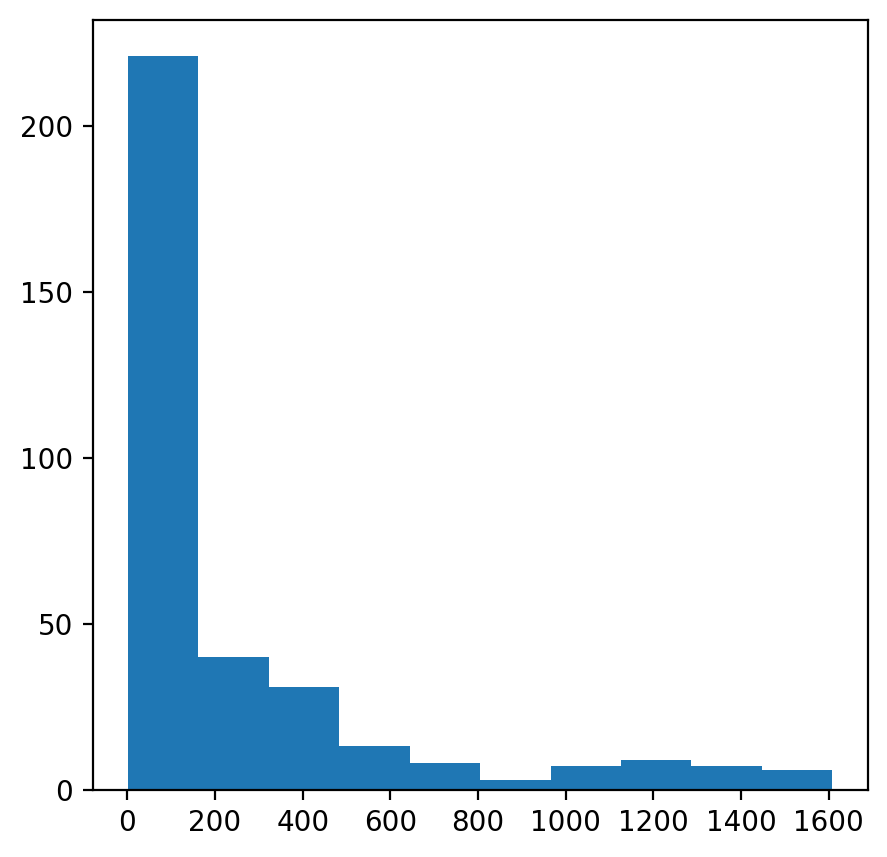

In [18]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

#plot
plt.hist(no)

In [19]:
frequent_notes = [note_ for note_, count in freq.items() if count>=50]
print(len(frequent_notes))

182


In [22]:
# new_music=[]

# for notes in notes_list:
#     temp=[]
#     for note_ in notes:
#         if note_ in frequent_notes:
#             temp.append(note_)            
#     new_music.append(temp)
    
# new_music = np.array(new_music)
new_music = []

for notes in notes_list:
    temp = []
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)
    new_music.append(np.array(temp))  # Convert the temp list to a NumPy array and append

# Now new_music is a list of NumPy arrays

In [23]:
no_of_timesteps = 32
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):
        
        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]
        
        x.append(input_)
        y.append(output)
        
x=np.array(x)
y=np.array(y)

In [24]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))

In [25]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)
    
x_seq = np.array(x_seq)

In [26]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y)) 
y_seq=np.array([y_note_to_int[i] for i in y])

In [28]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [29]:
# def lstm():
#   model = Sequential()
#   model.add(LSTM(128,return_sequences=True))
#   model.add(LSTM(128))
#   model.add(Dense(256))
#   model.add(Activation('relu'))
#   model.add(Dense(n_vocab))
#   model.add(Activation('softmax'))
#   model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
#   return model

In [31]:
from keras.layers import (Dense,
                            Flatten,Conv1D,Embedding,MaxPool1D,Dropout,GlobalMaxPool1D)
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
# import keras.backend as K

# K.clear_session()
model = Sequential()
    
#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=32,trainable=True)) 

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
    
model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))
          
#model.add(Conv1D(256,5,activation='relu'))    
model.add(GlobalMaxPool1D())
    
model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))
    
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 32, 100)           18200     
                                                                 
 conv1d (Conv1D)             (None, 32, 64)            19264     
                                                                 
 dropout (Dropout)           (None, 32, 64)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 16, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 16, 128)           24704     
                                                                 
 dropout_1 (Dropout)         (None, 16, 128)           0         
                                                        

In [32]:
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)

In [38]:
from keras.callbacks import ModelCheckpoint
filepath = "../working/saved_models-improvement-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath,monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')
callbacks_list = [checkpoint]

In [48]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=100, validation_data=(np.array(x_val),np.array(y_val)),verbose=1)

Epoch 1/10
492/492 [==============================] - 18s 36ms/step - loss: 2.5040 - acc: 0.2829 - val_loss: 2.9174 - val_acc: 0.2334
Epoch 2/10
492/492 [==============================] - 23s 48ms/step - loss: 2.4916 - acc: 0.2872 - val_loss: 2.8987 - val_acc: 0.2396
Epoch 3/10
492/492 [==============================] - 31s 63ms/step - loss: 2.4849 - acc: 0.2876 - val_loss: 2.9103 - val_acc: 0.2385
Epoch 4/10
492/492 [==============================] - 35s 71ms/step - loss: 2.4731 - acc: 0.2899 - val_loss: 2.8902 - val_acc: 0.2404
Epoch 5/10
492/492 [==============================] - 35s 72ms/step - loss: 2.4753 - acc: 0.2868 - val_loss: 2.8915 - val_acc: 0.2441
Epoch 6/10
492/492 [==============================] - 37s 75ms/step - loss: 2.4627 - acc: 0.2906 - val_loss: 2.8835 - val_acc: 0.2462
Epoch 7/10
492/492 [==============================] - 34s 70ms/step - loss: 2.4599 - acc: 0.2883 - val_loss: 2.8702 - val_acc: 0.2518
Epoch 8/10
492/492 [==============================] - 31s 62ms

In [49]:
# #loading best model
# from keras.models import load_model
# model = load_model('best_model.h5')

In [50]:
len(x_val)

15725

In [51]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(10):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    y_pred= np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]
    
print(predictions)

1/1 [==============================] - 0s 18ms/step
[72, 72, 72, 72, 144, 144, 138, 138, 138, 138]


In [52]:
random_music

array([169,   0, 169,   0, 169, 168, 160, 107,  54,  65, 122,  65,  72,
         9,  72,  42,  87,  42,  87,   9,  42,  72,  72,  72,  72,  72,
       144, 144, 138, 138, 138, 138])

In [53]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x)) 
predicted_notes = [x_int_to_note[i] for i in predictions]

In [55]:
def convert_to_midi(prediction_output):
   
    offset = 0
    output_notes = []

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:
        
        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                
                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Piano()
                notes.append(new_note)
                
            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
            
        # pattern is a note
        else:
            
            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Piano()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

In [56]:
convert_to_midi(predicted_notes)